In [503]:
from scipy.io import wavfile

In [504]:
import matplotlib.pyplot as plt

In [505]:
import numpy as np

In [506]:
wav_file = "./Collection - 10.07.21 - Cleaned_Data/mimosa_construction-18.15.50.wav"

In [507]:
samplerate, data = wavfile.read(wav_file)


In [508]:
length = int(len(data/ samplerate))

In [509]:
start = 0 

In [510]:
finish = samplerate

In [511]:
new_data = np.array([])

In [512]:
while start < len(data):
    data_new = data[start:finish]
    snippet_mean = np.mean(data_new)
    new_data = np.append(new_data, [snippet_mean])
    start = start + samplerate
    finish = finish + samplerate

In [513]:
transformed_data = new_data[0:len(new_data) - 1]

In [514]:
print(len(new_data))

902


In [515]:
split_array = np.array_split(new_data, 15)

In [516]:
print(len(split_array[0]))

61


In [517]:
np.mean(split_array[5])

-87.90941333333333

In [518]:
nyq = 0.5 *samplerate

In [519]:
low_cut = 0

In [520]:
high_cut = 20

In [521]:
low = low_cut/nyq

In [522]:
high = high_cut/nyq

In [523]:
from scipy import signal

In [524]:
np.mean(new_data)

-89.64523278929063

In [525]:
b, a = signal.butter(20, 0.1, 'low')
filteredData = signal.filtfilt(b, a, new_data) #data is the signal to be filtered

In [526]:
np.mean(filteredData)

-41.061109971058315

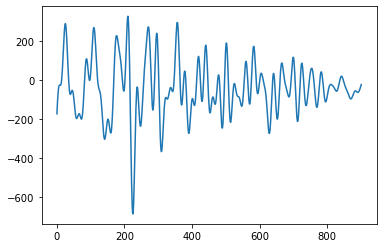

In [527]:
plt.plot(filteredData)

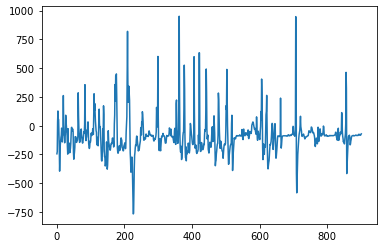

In [528]:
plt.plot(new_data)

In [529]:
print(len(filteredData))

902


In [530]:
split_array = np.array_split(filteredData, 15)

In [531]:
np.mean(split_array[5])

-55.85353185530194

In [532]:
from scipy.stats import skew

In [533]:
i = 0
while i < len(split_array):
    mean = np.mean(split_array[i])
    std = np.std(split_array[i])
    print(std)
    i = i + 1

138.99155266850426
147.73020411653368
170.75713875073902
282.7630547174239
163.92473407017974
175.71381405414382
107.35346826059235
96.52461160902308
113.6904737770889
91.59022853412465
97.99563740011078
90.4039238903921
72.26054227771336
37.17718326415792
31.000526495147085


In [534]:
 i = 0
while i < len(split_array):
    skew_value = skew(split_array[i])
    print(skew_value)
    i = i + 1


0.6993102838297226
-0.014112267396911427
0.8074024926470705
-0.7877290742259586
-0.12635324554902871
0.31671309706199763
0.0670823982443603
0.7191116346239358
0.614716459581156
0.3943366661824154
-0.358139982349627
-0.3766193620976065
-0.050663562467238694
-0.0029171630883619796
0.7101940718073757


In [535]:
from scipy.stats import kurtosis


In [536]:
 i = 0
while i < len(split_array):
    kurtosis_value = kurtosis(split_array[i])
    print(kurtosis_value)
    i = i + 1

-0.5125149343578794
-1.1369767107924391
-0.6815662970106176
-0.36425597948344146
-1.3832897391900913
-0.32793457714281216
-0.7140421913497215
-0.5345313290899925
-0.14318267359942638
-1.0099645883937212
-1.2093835982805667
-0.6908112822547596
-1.4305299178257065
-0.16607277366919604
-0.13171766961027043


In [537]:
corr = signal.correlate(split_array[2], split_array[4])

In [538]:
lags = signal.correlation_lags(len(split_array[2]), len(split_array[4]))
corr /= np.max(corr)

0.0


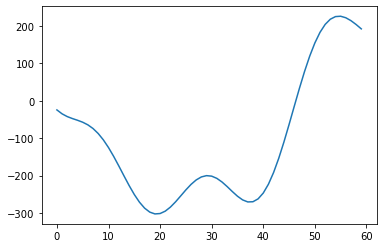

In [539]:
plt.plot(split_array[2])
print(np.mean(lags))

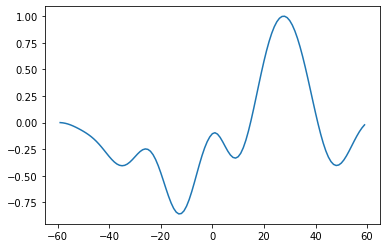

In [540]:
plt.plot(lags, corr)


In [541]:
fft_convolve = signal.fftconvolve(split_array[2], split_array[4])

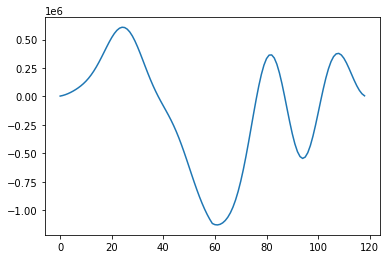

In [542]:
plt.plot(fft_convolve)

In [543]:
max = signal.argrelmax(split_array[2])
print(max)

(array([29, 55], dtype=int64),)


[19 57]


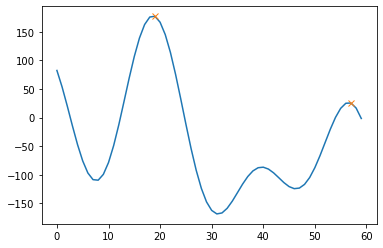

In [564]:
peaks, _ = signal.find_peaks(split_array[7], height=0)
plt.plot(split_array[7])
plt.plot(peaks, split_array[7][peaks], "x")
print(peaks)

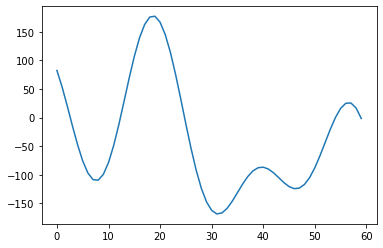

In [565]:
plt.plot(split_array[7])

In [546]:
csv_file_decibel = "./Collection - 10.07.21 - Cleaned_Data/mimosa_construction-18.15.50_decibel.csv"

In [547]:
import pandas as pd

In [548]:
decibel_df = pd.read_csv(csv_file_decibel)

In [549]:
conv_arr= decibel_df.values

In [550]:
decibel = np.delete(conv_arr,[0],axis=1) 
decibel = decibel.ravel()

In [551]:
decibel_split_array = np.array_split(decibel, 15)

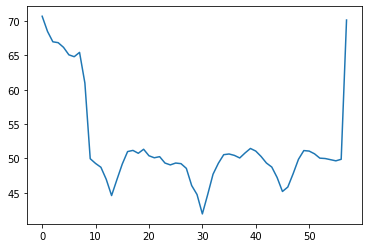

In [566]:
plt.plot(decibel_split_array[7])

[ 7 17 19 22 25 35 39 49]


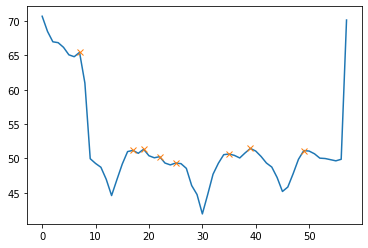

In [567]:
peaks, _= signal.find_peaks(decibel_split_array[7], height=0)
plt.plot(decibel_split_array[7])
plt.plot(peaks, decibel_split_array[7][peaks], "x")

print(peaks)

In [554]:
from scipy.misc import derivative


In [555]:
from pyeeg import hjorth_mobility_complexity


In [556]:
#erste Wert Mobility, zweite Complexity. 1. the proportion of standard deviation of the power spectrum  2. Je weiter entfernt von 1, desto unterschiedlicher ist das Signal zu einer Sinuswelle 
hjorth_mobility_complexity.hjorth(split_array[4])

(0.02723290702961233, 14.772069778855517)